In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv(r"premium\artifact\data_ingestion\2022-10-26-16-01-01\ingested_data\train\insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,49,male,35.9,0,no,southeast,8124.41
1,62,male,21.4,0,no,southwest,12957.12
2,30,male,24.4,3,yes,southwest,18259.22
3,27,male,33.2,2,no,northwest,4058.71
4,26,female,28.8,0,no,northeast,3385.40
...,...,...,...,...,...,...,...
931,55,female,33.5,2,no,northwest,12269.69
932,28,male,24.0,3,yes,southeast,17663.14
933,28,female,17.3,0,no,northeast,3732.63
934,57,female,28.7,0,no,southwest,11455.28


In [4]:
df["cat_age"] = pd.cut(
                df["age"],
                bins=[0.0, 20.0, 30.0, 40.0, 50.0, np.inf],
                labels=[1,2,3,4,5]
            )

In [5]:
df["cat_age"]


0      4
1      5
2      2
3      2
4      2
      ..
931    5
932    2
933    2
934    5
935    1
Name: cat_age, Length: 936, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [6]:
df["cat_age"].unique()


[4, 5, 2, 3, 1]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

<AxesSubplot: ylabel='Frequency'>

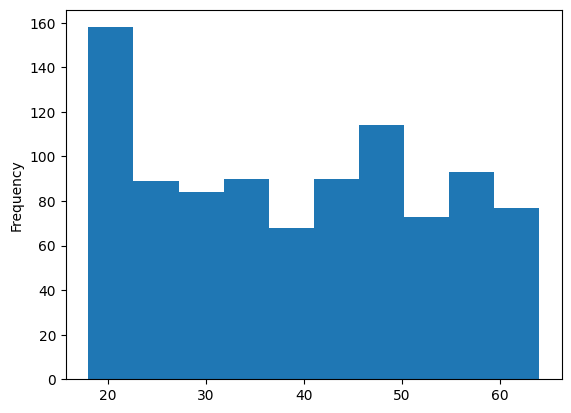

In [7]:
df["age"].plot(kind="hist")


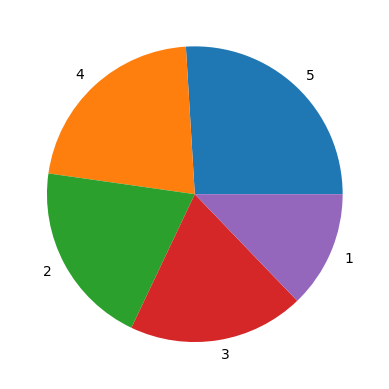

In [8]:
plt.pie(df.cat_age.value_counts(), labels = df.cat_age.value_counts().index)
plt.show()

In [9]:
df['children'].unique()


array([0, 3, 2, 1, 4, 5], dtype=int64)

In [10]:
df.describe()


,age,bmi,children,expenses
count,936.000000,936.000000,936.000000,936.000000
mean,39.204060,30.654274,1.091880,13218.721378
std,14.011684,6.064608,1.180999,12075.506346
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.200000,0.000000,4710.600000
50%,39.000000,30.500000,1.000000,9382.030000
75%,51.000000,34.600000,2.000000,16452.095000
max,64.000000,53.100000,5.000000,60021.400000


In [11]:
df.dtypes


age            int64
sex           object
bmi          float64
children       int64
smoker        object
region        object
expenses     float64
cat_age     category
dtype: object

In [12]:
df['expenses'] = df['expenses'].astype('float64')
df['expenses']

0       8124.41
1      12957.12
2      18259.22
3       4058.71
4       3385.40
         ...   
931    12269.69
932    17663.14
933     3732.63
934    11455.28
935     1980.07
Name: expenses, Length: 936, dtype: float64

In [13]:
df['sex'].unique()


array(['male', 'female'], dtype=object)

In [14]:
df['smoker'].unique()


array(['no', 'yes'], dtype=object)

In [15]:
df['region'].unique()


array(['southeast', 'southwest', 'northwest', 'northeast'], dtype=object)

In [16]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
cat_age     0
dtype: int64

In [17]:
corr = df.corr()
corr

C:\Users\singh\AppData\Local\Temp\ipykernel_6532\2438084875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,age,bmi,children,expenses
age,1.000000,0.110223,0.078234,0.292718
bmi,0.110223,1.000000,0.013877,0.214508
children,0.078234,0.013877,1.000000,0.102325
expenses,0.292718,0.214508,0.102325,1.000000


<AxesSubplot: >

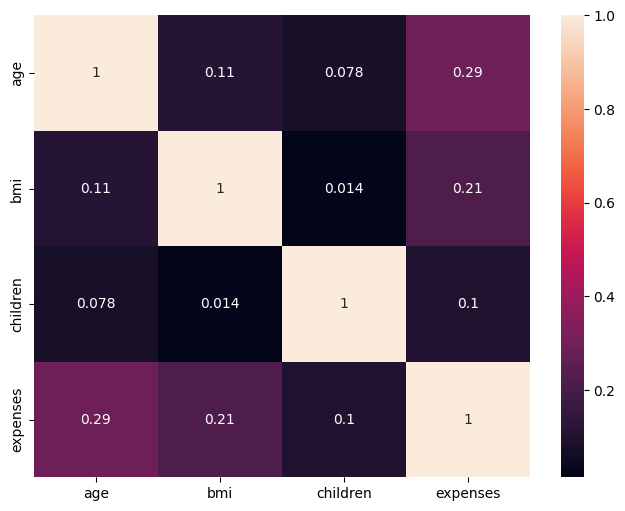

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)

<AxesSubplot: xlabel='bmi', ylabel='expenses'>

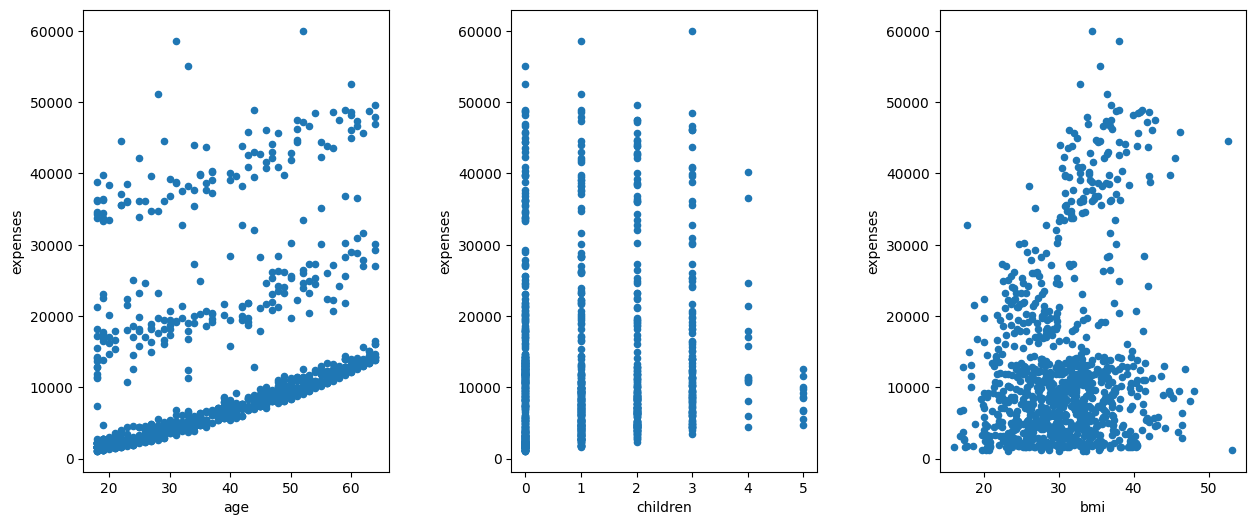

In [19]:
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
df.plot(kind='scatter', x='age', y='expenses', ax=axes[0])
df.plot(kind='scatter', x='children', y='expenses', ax=axes[1])
df.plot(kind='scatter', x='bmi', y='expenses', ax=axes[2])

<AxesSubplot: ylabel='Frequency'>

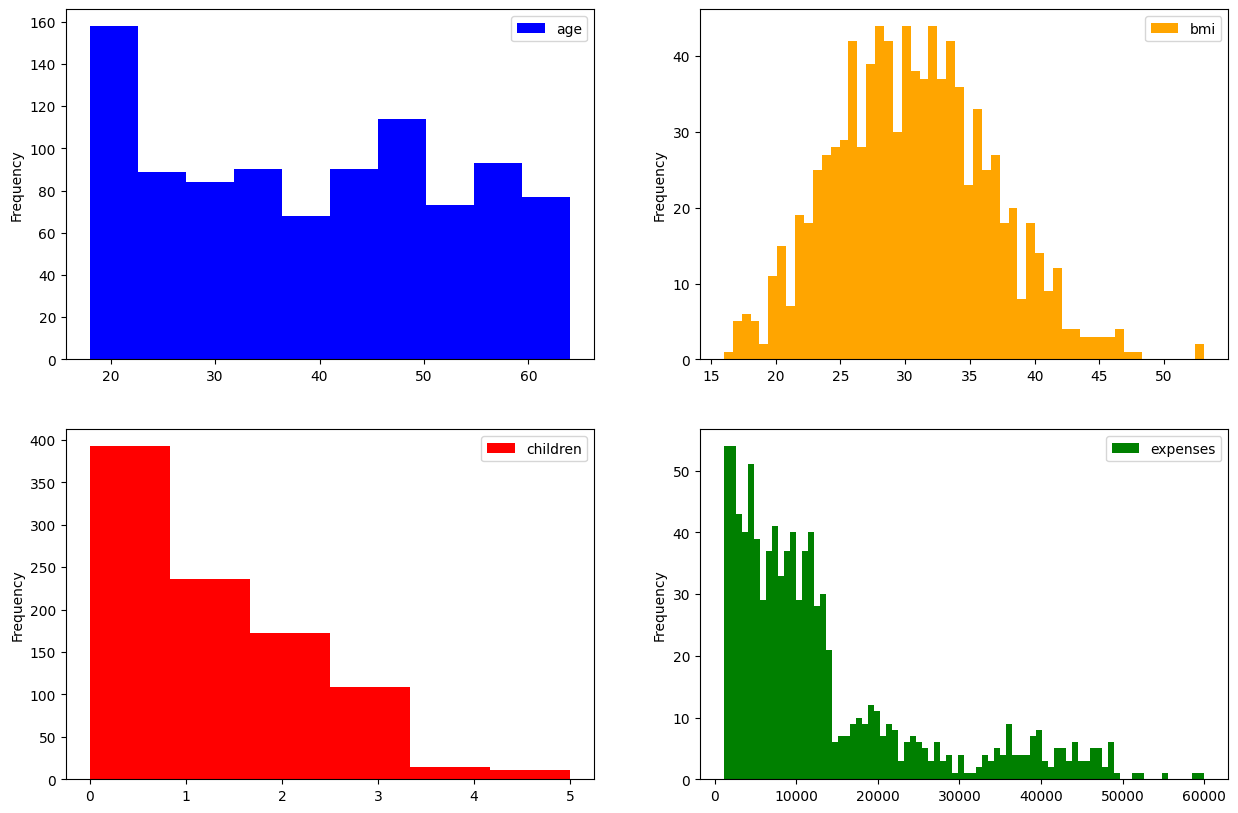

In [20]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

df.plot(kind='hist', y='age', ax=axes[0][0], color = 'blue')
df.plot(kind='hist', y='bmi', ax=axes[0][1], color = 'orange', bins = 54)
df.plot(kind='hist', y='children', ax=axes[1][0], color = 'red', bins = 6)
df.plot(kind='hist', y='expenses', ax=axes[1][1], color = 'green', bins = 80)

<AxesSubplot: xlabel='bmi', ylabel='expenses'>

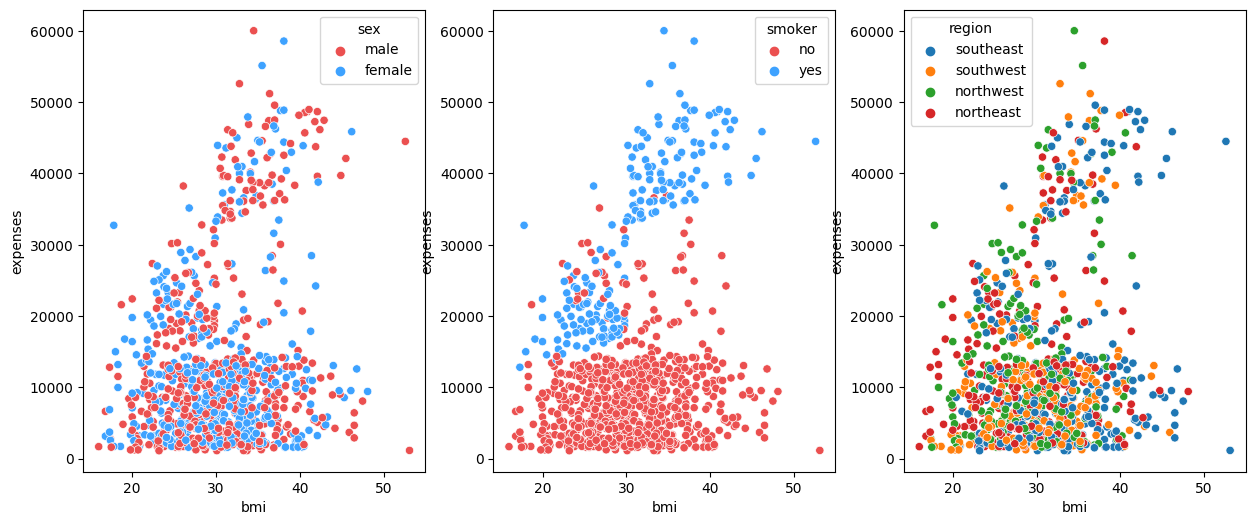

In [21]:
palette=['#EB5050','#3EA2FF']
fig, axes = plt.subplots(ncols = 3, figsize = (15,6), squeeze=True)
sns.scatterplot(x='bmi', y='expenses', ax=axes[0], data=df,hue='sex', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[1], data=df,hue='smoker', palette=palette)
sns.scatterplot(x='bmi', y='expenses', ax=axes[2], data=df,hue='region')

<AxesSubplot: title={'center': 'Smoker'}>

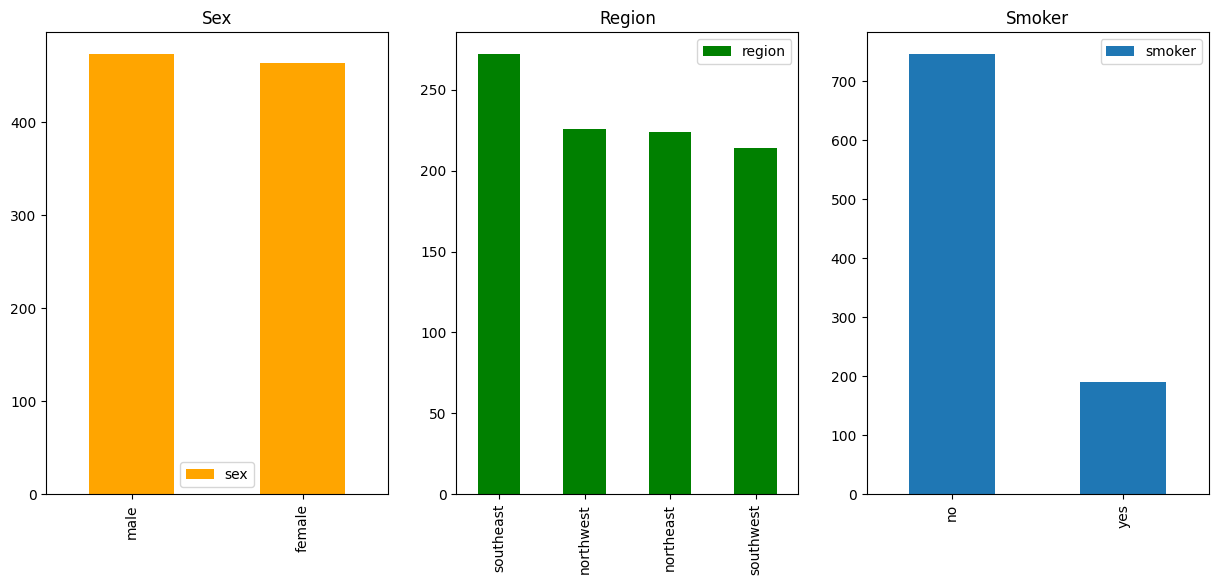

In [22]:
fig, axes = plt.subplots(ncols=3, figsize = (15,6))
df['sex'].value_counts().plot(kind='bar', color = 'orange', ax=axes[0],title="Sex", legend = 'sex') 
df['region'].value_counts().plot(kind='bar', color = 'green', ax=axes[1],title="Region", legend = 'region')
df['smoker'].value_counts().plot(kind='bar', ax=axes[2],title="Smoker", legend = 'smoker')

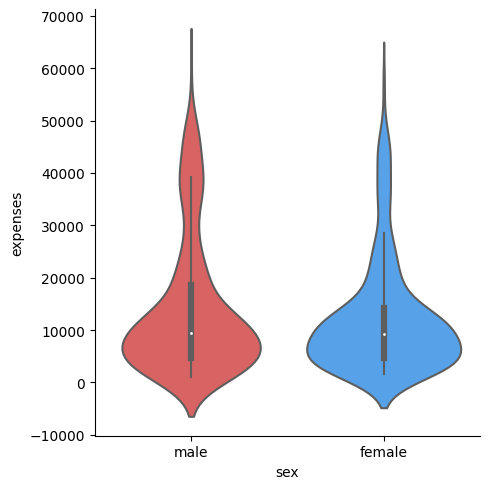

In [23]:
palette=['#EB5050','#3EA2FF']
sns.catplot(x='sex', y='expenses', kind='violin', palette=palette, data=df)

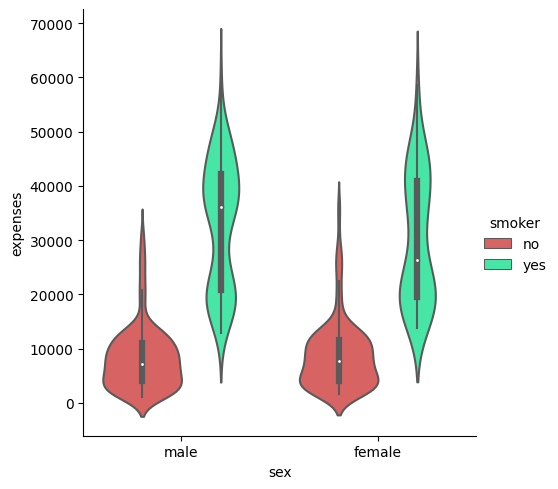

In [24]:
palette=['#EB5050','#2DFFAB'] 
sns.catplot(x='sex', y='expenses', kind='violin', hue='smoker', palette=palette, data=df)

C:\Users\singh\AppData\Local\Temp\ipykernel_6532\3740879931.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['expenses'], fit=norm)


Text(0.5, 1.0, 'Distribution of Charges')

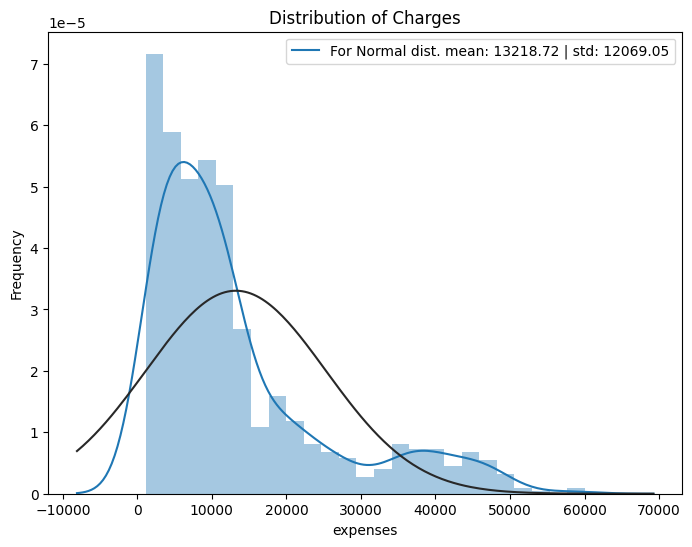

In [25]:
from scipy import stats
from scipy.stats import norm
fig =plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(df['expenses'], fit=norm)
(mu,sigma)= norm.fit(df['expenses'])
plt.legend(['For Normal dist. mean: {:.2f} | std: {:.2f}'.format(mu,sigma)])
plt.ylabel('Frequency')
plt.title('Distribution of Charges')